In [1]:
import pandas as pd    ###dataread###（1〜4行目と出力の上5行くらいを図示）
data  = pd.read_csv("sensor_data_200.txt", delimiter=" ", 
                    header=None, names = ("date","time","ir","lidar"))
data

,date,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
5,20180122,95835,327,212
6,20180122,95838,293,215
7,20180122,95840,309,218
8,20180122,95843,323,208
9,20180122,95846,292,217


In [2]:
print(data["lidar"][0:5]) ###getvalues###

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64


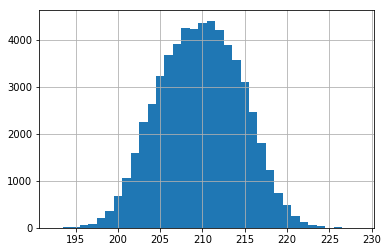

In [3]:
import matplotlib.pyplot as plt   ###drawhist###
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align='left')
plt.show()

In [4]:
mean1 = sum(data["lidar"].values)/len(data["lidar"].values)   ###calcmean###
mean2 = data["lidar"].mean()
print(mean1,mean2)

209.737132976 209.737132976


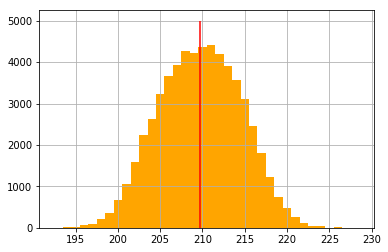

In [5]:
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),color="orange",align='left')   ###avgplot###
plt.vlines(mean1,ymin=0,ymax=5000,color="red")
plt.show()

In [6]:
# 定義から計算　                     ### calcvar
xs = data["lidar"].values  
mean = sum(xs)/len(xs)
diff_square = [ (x - mean)**2 for x in xs]

sampling_var = sum(diff_square)/(len(xs))     # 標本分散
unbiased_var = sum(diff_square)/(len(xs)-1) # 不偏分散

print(sampling_var)
print(unbiased_var)

# Pandasを使用
pandas_sampling_var = data["lidar"].var(ddof=False) # 標本分散
pandas_default_var = data["lidar"].var()        # デフォルト（不偏分散）

print(pandas_sampling_var)
print(pandas_default_var)

# NumPyを使用
import numpy as np

numpy_defalut_var = np.var(data["lidar"])  # デフォルト（標本分散）
numpy_unbiased_var = np.var(data["lidar"], ddof=1)  # 不偏分散

print(numpy_defalut_var)
print(numpy_unbiased_var)

23.4077097703
23.4081065986
23.4077097703
23.4081065986
23.4077097703
23.4081065986


In [7]:
import math ###  calcstddev

# 定義から計算
stddev1 = math.sqrt(sampling_var)
stddev2 = math.sqrt(unbiased_var)

# Pandasを使用 
pandas_stddev = data["lidar"].std()

print(stddev1)
print(stddev2)
print(pandas_stddev)

4.838151482774605
4.83819249292072
4.83819249292


In [8]:
freqs = pd.DataFrame(data["lidar"].value_counts())  ###freqs###（Outは上から5行くらい）
freqs

,lidar
211,4409
210,4355
208,4261
209,4228
212,4201
207,3920
213,3897
206,3674
214,3572
205,3225


In [9]:
freqs["probs"] = freqs["lidar"]/len(data["lidar"]) ###addprobs###Outは上5行程度
freqs

,lidar,probs
211,4409,0.074744
210,4355,0.073829
208,4261,0.072235
209,4228,0.071676
212,4201,0.071218
207,3920,0.066454
213,3897,0.066064
206,3674,0.062284
214,3572,0.060555
205,3225,0.054672


In [10]:
sum(freqs["probs"])  ###confirmsum###

1.0

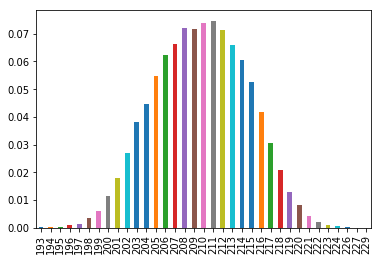

In [11]:
freqs["probs"].sort_index().plot.bar()   ###probdist###
plt.show()

In [12]:
def drawing(): #ややこしいので関数として定義  ###one_sampling###
    return freqs.sample(n=1, weights="probs").index[0]

drawing() # 実行

205

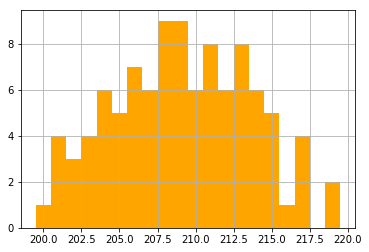

In [13]:
#samples = [ drawing() for i in range(len(data))] ### simulation ###
samples = [ drawing() for i in range(100)] ### simulation ###
simulated = pd.DataFrame(samples, columns=["lidar"])
p = simulated["lidar"]
p.hist(bins = max(p) - min(p),color="orange",align='left')  
plt.show()

In [14]:
def p(x, mu=209.7, dev=23.4):   ###pdf_from_def###
    return math.exp(-(x - mu)**2/(2*dev))/math.sqrt(2*math.pi*dev)

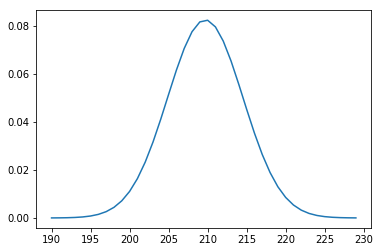

In [15]:
xs = range(190,230)   ###pdf_plot_from_def###
ys = [p(x) for x in xs]

plt.plot(xs,ys)
plt.show()

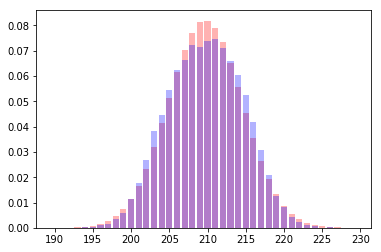

In [16]:
def prob(x,width=0.5):                                     ###prob_plot_from_def###
    return width*( p(x-width) + p(x+width) )

xs = range(190,230)
ys = [prob(x) for x in xs]

plt.bar(xs,ys, color="red", alpha=0.3) #alphaでグラフを透明にできる
f = freqs["probs"].sort_index()
plt.bar(f.index, f.values, color="blue", alpha=0.3)
plt.show()

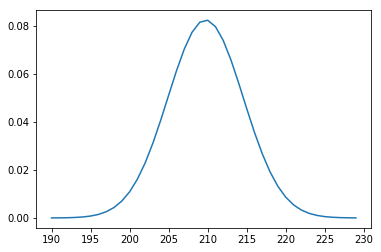

In [20]:
from scipy.stats import norm    ###prob_plot_from_lib###

xs = range(190,230)
ys = [norm.pdf(x, mean1, stddev1) for x in xs]

plt.plot(xs,ys)
plt.show()

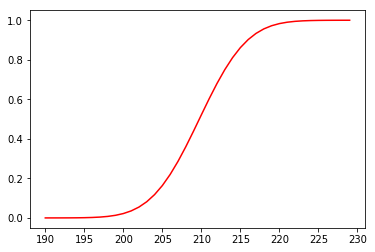

In [21]:
xs = range(190,230)                                ###cdf###
ys = [norm.cdf(x, mean1, stddev1) for x in xs]

plt.plot(xs,ys, color="red") 
plt.show()

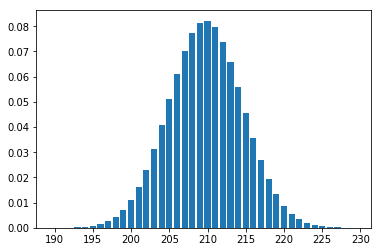

In [22]:
xs = range(190,230)              ###prob_cdf###
ys = [norm.cdf(x+0.5, mean1, stddev1) -  norm.cdf(x-0.5, mean1, stddev1) for x in xs]

plt.bar(xs,ys)
plt.show()

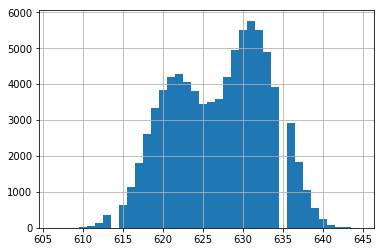

In [24]:
data  = pd.read_csv("sensor_data_600.txt", delimiter=" ",       ###hist_600###
                    header=None, names = ("date","time","ir","lidar"))

data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align='left')
plt.show()